#  📷 Image Classification ML Model by Gayana Senarathne (KUHDSE21.1F-012) 

---


<br>with Tensorflow
<br>by using - Fashion MNIST Dataset 
<br>Data Source - https://www.kaggle.com/datasets/zalando-research/fashionmnist
<br>(loaded by keras)
<br>Final Accuracy -  0.8859

#Import Libraries

In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [17]:
print(tf.__version__)

2.9.2


#Load Data

In [18]:
#import fashion_mnist dataset from keras
fashion_mnist = keras.datasets.fashion_mnist

In [19]:
#split dataset
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

#Create Classes

In [20]:
#define data items classes
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
               'Shirt','Sneaker','Bag','Ankle boot']

#Check Dataset

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
len(train_labels)

60000

In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
len(test_labels)

10000

#Inspect images for pre-processing

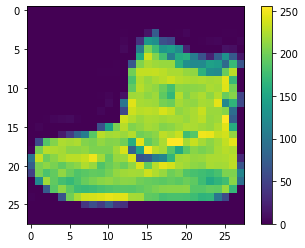

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Data Pre-processing

re scale image pixel value range from 1-255 to 0-1

In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#Display images in dataset (first 25) with class labels

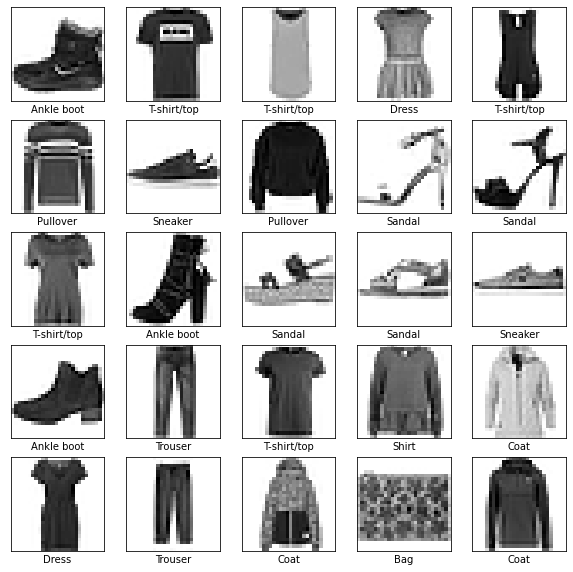

In [31]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


#Building Neural Network

setup layers

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu), #128 nodes
    keras.layers.Dense(10, activation = tf.nn.softmax) #10 nodes - realted to classes
])

Compile model

In [34]:
model.compile(optimizer ='adam', # update model on data and loss function
              loss ='sparse_categorical_crossentropy', # messure how accurate the model
              metrics = ['accuracy'] )

#Train Model

feeding data

In [49]:
model.fit(train_images, train_labels, epochs=10) # 5 Cycles (5 ephochs)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2809 - accuracy: 0.8964
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2696 - accuracy: 0.9009
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2572 - accuracy: 0.9050
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2484 - accuracy: 0.9082
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2386 - accuracy: 0.9108
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2303 - accuracy: 0.9136
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2257 - accuracy: 0.9145
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2163 - accuracy: 0.9200
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2098 - accuracy: 0.9218
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.202

Model evaluation

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Model test accuracy:- ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8860
Model test accuracy:-  0.8859999775886536


Make predictions

In [37]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [38]:
predictions[0] #10 values for each 10 classes 

array([5.1423367e-06, 3.6771075e-07, 3.6433184e-07, 9.4314481e-07,
       3.3872923e-06, 9.1641163e-03, 4.9549908e-06, 2.1580836e-02,
       1.8763635e-04, 9.6905237e-01], dtype=float32)

In [39]:
# find maximum confident class
np.argmax(predictions[0])
#result  - class 9 - Ankle boot

9

In [41]:
#check with test label output
test_labels[0]

9

#Check values prediction by plotting

Define functions for design customized plottr

In [43]:
def plot_image(i, prediction_array, true_label, img):
  #imageview struture
  prediction_array, true_label, img=prediction_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  #get highest predicted class value
  predicted_label = np.argmax(prediction_array)

  #setup bars colors in chart by value
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(prediction_array),class_names[true_label]),color=color)


def plot_value_array(i, prediction_array, true_label):
  prediction_array, true_label = prediction_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplotting = plt.bar(range(10),prediction_array,color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)

  thisplotting[predicted_label].set_color('red')
  thisplotting[true_label].set_color('blue')

Visualize note* = (Correct values are in 'Blue' and wrong values are in 'Red')

<function matplotlib.pyplot.show(*args, **kw)>

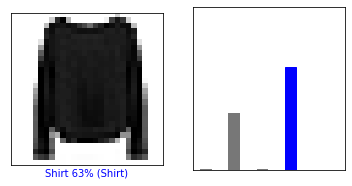

In [46]:
# check prediction of image 0 in test image set by plotting
i = 2500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show

View multiple images by plotting predictions

<function matplotlib.pyplot.show(*args, **kw)>

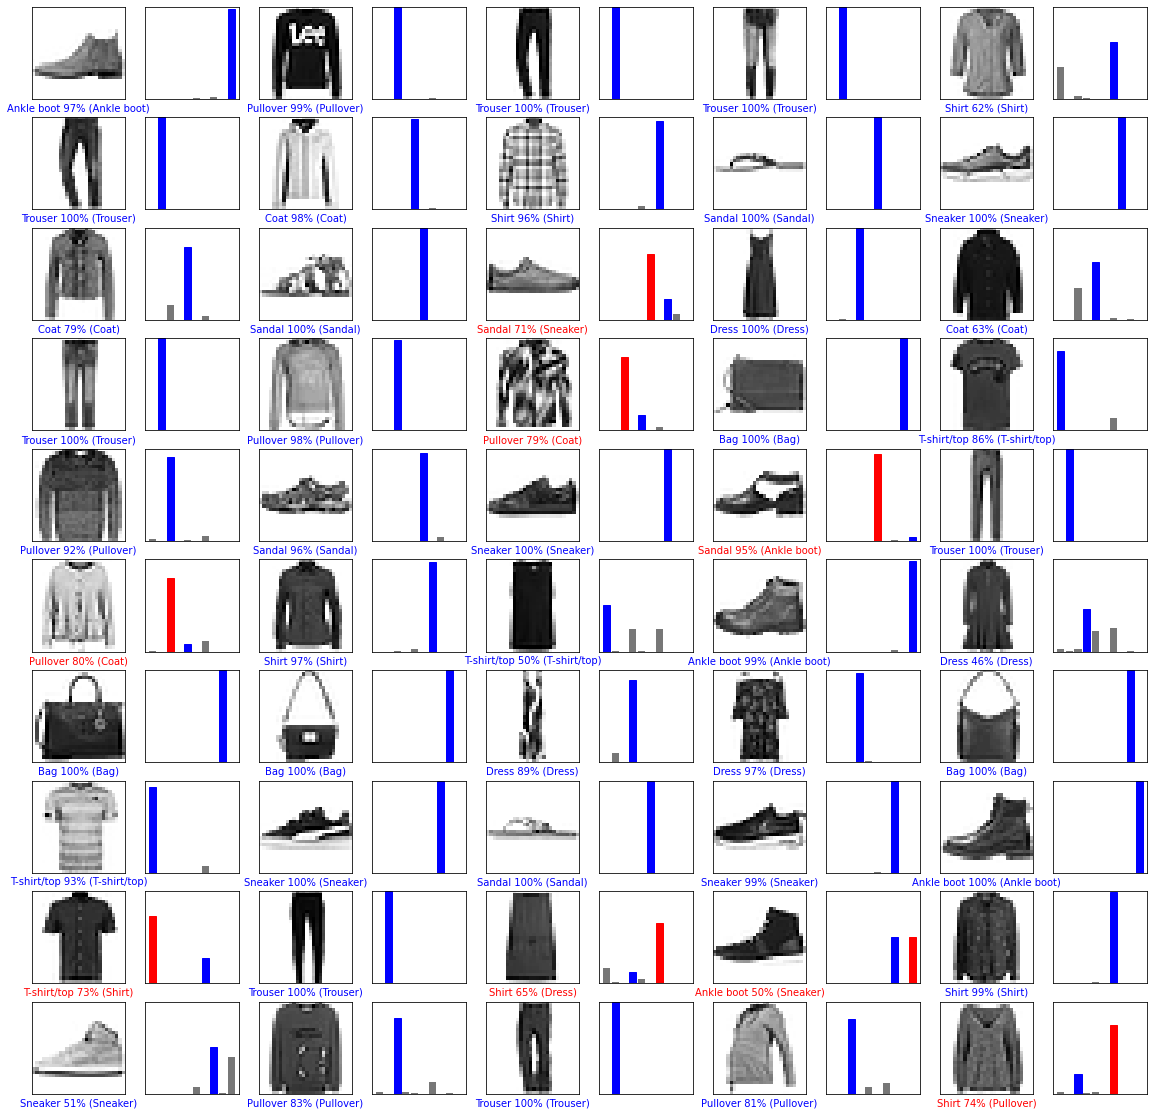

In [48]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show

🙅 ***End***